In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Wat is het probleem?

## Op basis van de abalone dataset moet door middel van regressie een voorspelling van een datapunt worden gemaakt.
## Uiteindelijk moet de lengte van een abalone worden voorspeld.

# Data verzamelen

In [6]:
# Load the data
data = pd.read_csv('binaire-abalone.csv')
display(data.head())

# Convert 'Type' column to numeric values
data['Type'] = data['Type'].replace({'M': 1, 'F': 2, 'I': 3})

# Display the first few rows of the dataset
display(data.head())

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


/tmp/ipykernel_8258/36660091.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Type'] = data['Type'].replace({'M': 1, 'F': 2, 'I': 3})


,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Data visualiseren

Type             1.955470
LongestShell     0.523992
Diameter         0.407881
Height           0.139516
WholeWeight      0.828742
ShuckedWeight    0.359367
VisceraWeight    0.180594
ShellWeight      0.238831
Rings            9.933684
dtype: float64
      Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
6        2         0.530     0.415   0.150       0.7775         0.2370   
9        2         0.550     0.440   0.150       0.8945         0.3145   
32       1         0.665     0.525   0.165       1.3380         0.5515   
33       2         0.680     0.550   0.175       1.7980         0.8150   
34       2         0.705     0.550   0.200       1.7095         0.6330   
...    ...           ...       ...     ...          ...            ...   
4145     1         0.670     0.525   0.200       1.7405         0.6205   
4146     1         0.695     0.530   0.210       1.5100         0.6640   
4148     1         0.770     0.605   0.175       2.0505         0.8005   
4149     3 

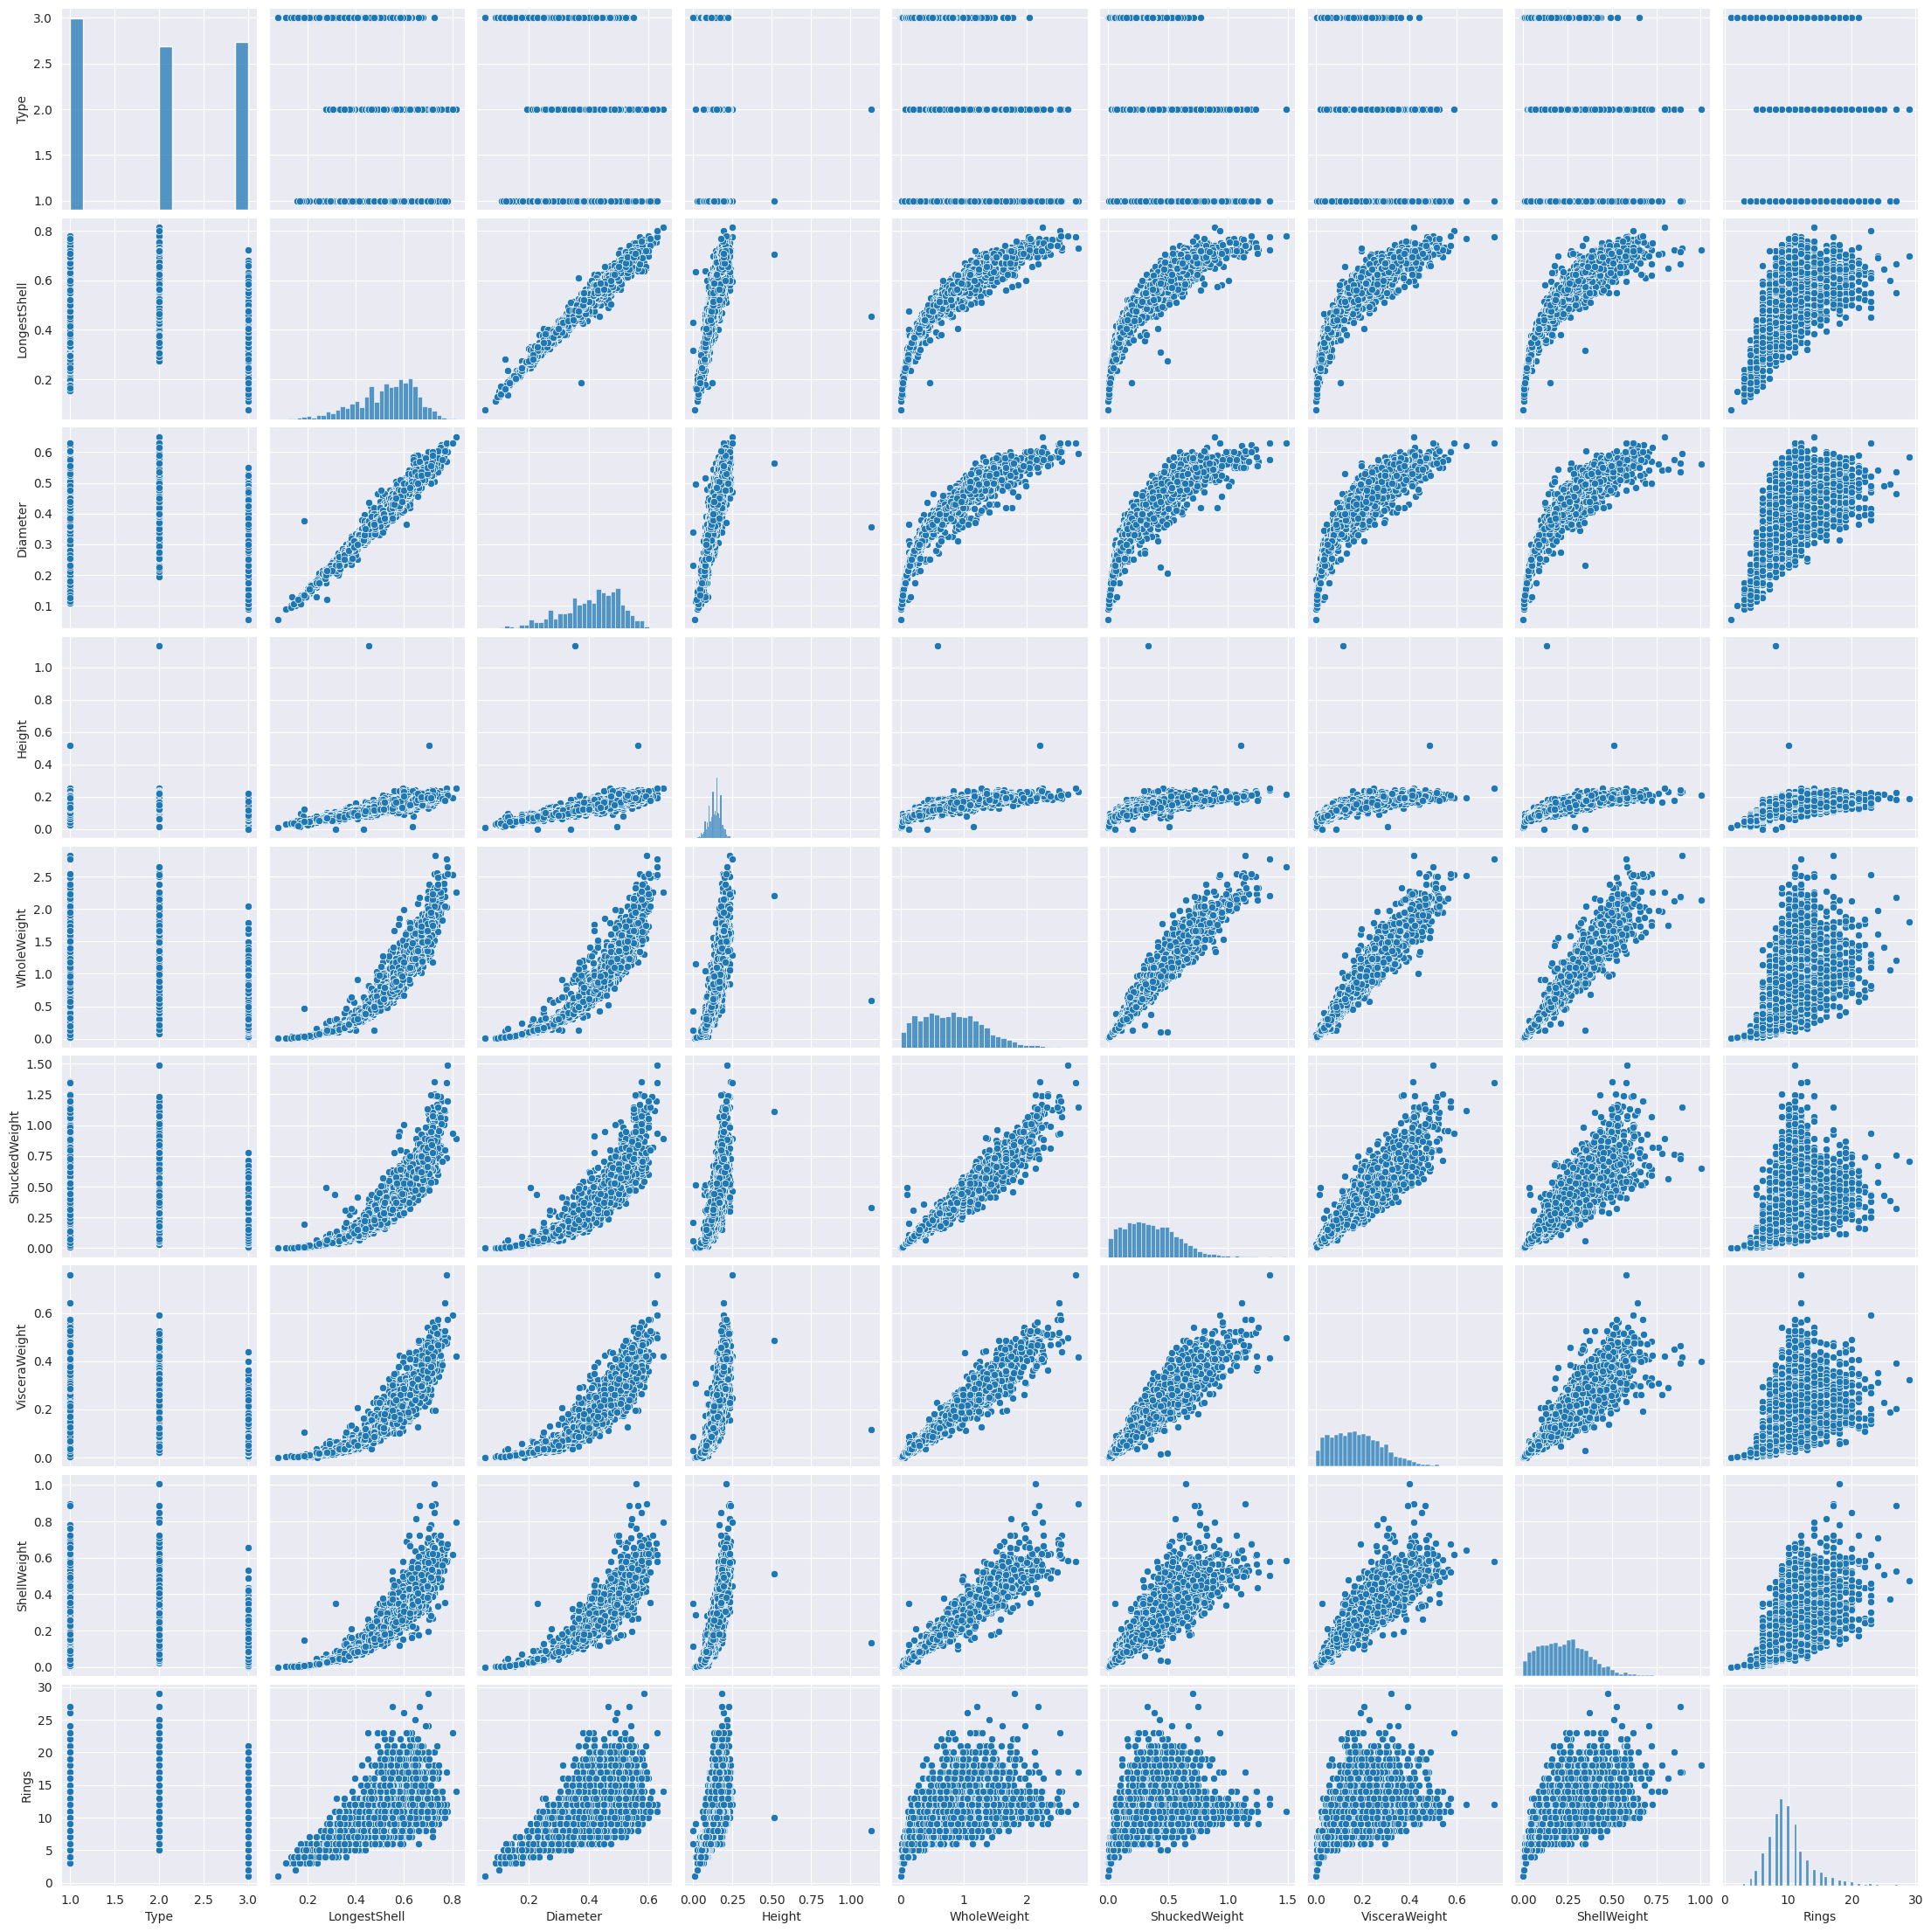

In [8]:
# Calculate means, standard deviations, and outliers
means = data.mean()
stds = data.std()
outliers = data[(np.abs(data - means) > 2*stds).any(axis=1)]
print(means)
print(outliers)
print(stds)

# Visualize the dataset
sns.pairplot(data)
plt.show()

# Data opschonen en voorbereiden

In [9]:
# Search for NaN and 0 values
print(data.isnull().sum())
print((data == 0).sum())

# Replace NaN and 0 values
data = data.replace(0, np.nan)
data = data.fillna(data.mean())

# Find outliers and remove them
means = data.mean()
stds = data.std()
outliers = data[(np.abs(data - means) > 2*stds).any(axis=1)]
print(outliers)
data = data.drop(outliers.index)

Type             0
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64
Type             0
LongestShell     0
Diameter         0
Height           2
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64
      Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
6        2         0.530     0.415   0.150       0.7775         0.2370   
9        2         0.550     0.440   0.150       0.8945         0.3145   
32       1         0.665     0.525   0.165       1.3380         0.5515   
33       2         0.680     0.550   0.175       1.7980         0.8150   
34       2         0.705     0.550   0.200       1.7095         0.6330   
...    ...           ...       ...     ...          ...            ...   
4145     1         0.670     0.525   0.200       1.7405         0.6205   
4146     1         0.695     0.530   0.2

In [11]:
display(data.head())

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
scaler = StandardScaler()

# Selecteer LogisticRegression model

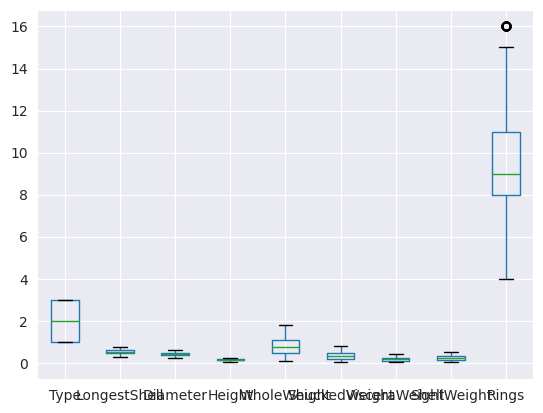

In [26]:
data.boxplot()
plt.show()

# Normalize the data (excluding the target 'Rings')
X_scaled = scaler.fit_transform(data.drop('Rings', axis=1))


In [24]:
# Target
y = data['Rings'].astype(float)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train en test het model

In [29]:
# Train en test het model
# Model aanmaken en trainen
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Voorspellingen maken
y_pred = model.predict(X_test)
pred_counts = pd.Series(y_pred).value_counts()

# Analyseer en evalueer

/tmp/ipykernel_8258/2253190255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")


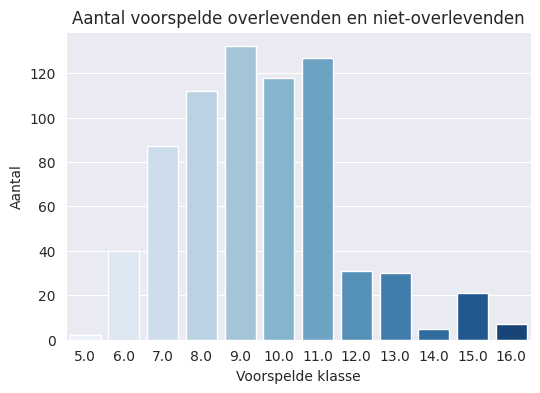

Aantal voorspelde overlevenden: 0
Aantal voorspelde niet-overlevenden: 0
Logistic Regression Train Score: 0.90
Logistic Regression Test Score: 0.88
Logistic Regression Modelnauwkeurigheid: 0.88


In [30]:
# Analyseer en evalueer
# Staafdiagram
plt.figure(figsize=(6, 4))
sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")

# Labels en titel
plt.xlabel("Voorspelde klasse")
plt.ylabel("Aantal")
plt.title("Aantal voorspelde overlevenden en niet-overlevenden")

# Toon de grafiek
plt.show()

# Aantal voorspelde overlevenden (Survived == 1) en niet-overlevenden (Survived == 0) volgens het model
predicted_survived_count = (y_pred == 1).sum()
predicted_not_survived_count = (y_pred == 0).sum()

# Print de aantallen voorspelde overlevenden en niet-overlevenden
print(f"Aantal voorspelde overlevenden: {predicted_survived_count}")
print(f"Aantal voorspelde niet-overlevenden: {predicted_not_survived_count}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Train Score: {train_score:.2f}")
print(f"Logistic Regression Test Score: {test_score:.2f}")
print(f"Logistic Regression Modelnauwkeurigheid: {accuracy:.2f}")

# Selecteer DecisionTreeClassifier model

In [31]:
# Definieer features (X) en doelvariabele (y)
X = data.drop('Rings', axis=1)
y = data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Maak het DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Train het model
dt_model.fit(X_train, y_train)

# Train score en test score
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)

# Voorspellingen maken
y_pred = dt_model.predict(X_test)


/tmp/ipykernel_8258/2584886038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")


Decision Tree Train Score: 0.90
Decision Tree Test Score: 0.88
Decision Tree Modelnauwkeurigheid: 0.12


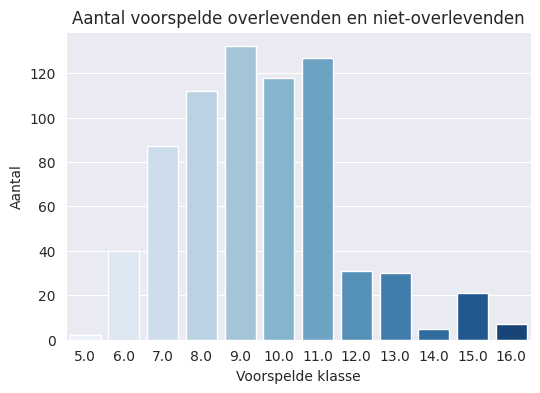

In [32]:
# Staafdiagram
plt.figure(figsize=(6, 4))
sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")

# Labels en titel
plt.xlabel("Voorspelde klasse")
plt.ylabel("Aantal")
plt.title("Aantal voorspelde overlevenden en niet-overlevenden")

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Train Score: {train_score:.2f}")
print(f"Decision Tree Test Score: {test_score:.2f}")
print(f"Decision Tree Modelnauwkeurigheid: {accuracy:.2f}")

# Selecteer RandomForestClassifier model

In [33]:
X = data.drop('Rings', axis=1)
y = data['Rings']

# Split de data in trainings- en testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [34]:
# Maak het RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train het model
rf_model.fit(X_train, y_train)

train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

# Voorspellingen maken
y_pred = rf_model.predict(X_test)

/tmp/ipykernel_8258/970928441.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")


Random Forest Train Score: 1.00
Random Forest Test Score: 0.24
Random Forest Modelnauwkeurigheid: 0.24


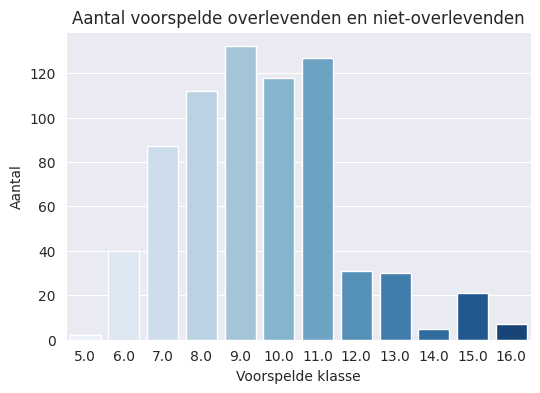

In [35]:
# Staafdiagram
plt.figure(figsize=(6, 4))
sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")

# Labels en titel
plt.xlabel("Voorspelde klasse")
plt.ylabel("Aantal")
plt.title("Aantal voorspelde overlevenden en niet-overlevenden")

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Train Score: {train_score:.2f}")
print(f"Random Forest Test Score: {test_score:.2f}")
print(f"Random Forest Modelnauwkeurigheid: {accuracy:.2f}")


# Vergelijking van de modellen

| Model         | Train Score            | Test Score             |
|---------------|------------------------|------------------------|
| LogisticRegression       | 1.00     | 0.70     |
| DecisionTreeClassifier        | 1.00     | 0.70      |
| RandomForestClassifier | 1.00     | 0.70     |

# Conclusie